# PROYECTO CRISIS ALIMENTARIA

Importación de librerias para tratar y limpiar datos:

In [1]:
import pandas as pd
import numpy as np 

In [ ]:
Importación de librerias para gráficos:

In [2]:
import matplotlib.pyplot as plt 



## 1. DATASET
Para trabajar en este proyecto, lo primero que necesito, son datos.
Parto incialmente de este enlace de kaggle y descargo el dataset: https://www.kaggle.com/roshansharma/world-food-production/data
Dicho dataset lo descarlo como csv y lo copio en la misma carpeta donde voy a trabajar.


In [3]:
df = pd.read_csv("FAO.csv",encoding="ISO-8859-1")  
df

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [3]:
df.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

In [6]:
df.Item.value_counts()

Milk - Excluding Butter     558
Eggs                        360
Cereals - Excluding Beer    347
Fish, Seafood               337
Maize and products          333
                           ... 
Sugar non-centrifugal        32
Palm kernels                 24
Cottonseed                   21
Ricebran Oil                 18
Meat, Aquatic Mammals         3
Name: Item, Length: 115, dtype: int64

# Observación de los datos del dataset

Comprobamos en el index que hay una serie de columnas que no nos hacen falta para el análisis de nuestro datos, como Area Abbreviation, Area Code, Item Code. El resto de columnas de momento las dejamos para seguir el proceso.


In [4]:
df = df.loc[:,['Area', 'Item', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013']]
df

,Area,Item,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,Zimbabwe,Milk - Excluding Butter,Food,1000 tonnes,-19.02,29.15,230.0,232.0,234.0,238.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,Zimbabwe,"Fish, Seafood",Feed,1000 tonnes,-19.02,29.15,27.0,25.0,27.0,23.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,Zimbabwe,"Fish, Seafood",Food,1000 tonnes,-19.02,29.15,6.0,6.0,6.0,8.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,Zimbabwe,"Aquatic Products, Other",Food,1000 tonnes,-19.02,29.15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [5]:
year = df.groupby("Area")['Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'].sum()

In [7]:
year

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),9523.0,9369.0,9788.0,10539.0,10641.0,10772.0,11126.0,12014.0,12537.0,13503.0,...,33755.0,33423.0,35359.0,39994.0,43357.0,43545.0,45290.0,46151.0,45196,45462
Viet Nam,23856.0,25220.0,26053.0,26377.0,26961.0,27355.0,27745.0,28698.0,29565.0,30841.0,...,95462.0,98395.0,99783.0,104261.0,104562.0,107692.0,113477.0,112747.0,125554,128111
Yemen,2982.0,3038.0,3147.0,3224.0,3328.0,3358.0,3420.0,3411.0,3386.0,3348.0,...,13461.0,14057.0,14852.0,16064.0,16201.0,17127.0,17008.0,17090.0,18371,18745


Obtenemos la cantidad total de materia prima que España ha producido desde 1961. 
Genero un gráfico con dichos datos para observar la evolución que ha habido desde dicha fecha hasta ahora.

In [6]:
Spain_total = year.loc["Spain",:]
Spain_total

Y1961     57983.0
Y1962     58728.0
Y1963     64092.0
Y1964     63547.0
Y1965     64796.0
Y1966     70248.0
Y1967     71315.0
Y1968     74617.0
Y1969     76067.0
Y1970     78177.0
Y1971     83404.0
Y1972     85289.0
Y1973     90955.0
Y1974     97978.0
Y1975     96302.0
Y1976     92870.0
Y1977     94513.0
Y1978     98947.0
Y1979    103518.0
Y1980    106473.0
Y1981    103272.0
Y1982    105492.0
Y1983    108171.0
Y1984    113349.0
Y1985    112503.0
Y1986    108995.0
Y1987    114346.0
Y1988    114625.0
Y1989    117972.0
Y1990    120074.0
Y1991    120149.0
Y1992    117991.0
Y1993    117297.0
Y1994    116546.0
Y1995    110088.0
Y1996    120240.0
Y1997    126645.0
Y1998    130147.0
Y1999    131408.0
Y2000    133017.0
Y2001    131812.0
Y2002    135708.0
Y2003    142802.0
Y2004    142711.0
Y2005    134618.0
Y2006    138483.0
Y2007    144947.0
Y2008    141519.0
Y2009    136073.0
Y2010    133940.0
Y2011    133445.0
Y2012    127967.0
Y2013    137594.0
Name: Spain, dtype: float64

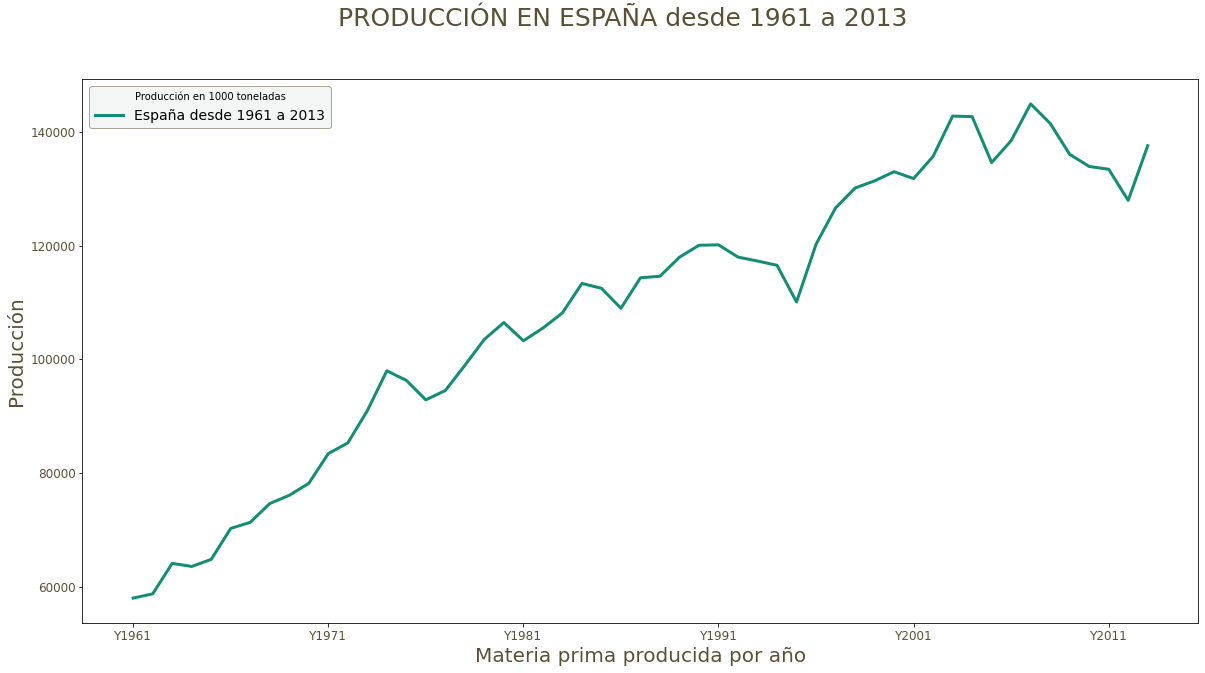

In [9]:
plt.figure(figsize=(20, 10))
Spain_total.plot(kind="line",label='España desde 1961 a 2013', color="#138D75", linewidth=3)
plt.legend(title="Producción en 1000 toneladas",loc='top_left',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
#plt.title('Desde 1961 a 20013', size=20, color="#5A5034")
plt.suptitle('PRODUCCIÓN EN ESPAÑA desde 1961 a 2013', size=25, color="#5A5034")
plt.xlabel("Materia prima producida por año",size=20, color="#5A5034")
plt.ylabel("Producción",size=20, color="#5A5034")
plt.xticks(rotation=0,FontSize=12,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Producción_España_desde1961.png',transparent=True)
plt.show()

Comprobamos que desde la toma de datos en 1961, ha ido ascendiendo progresivamente, aunque en tres años en concreto hubo un claro descenso de dicha producción global de las materias primas.
Esos años fueron: 1995, 2005 y desde 2007 hasta 2012.
Este estudio se centrará en la crisis producida en España en 2008, asi que nos centraremos cinco años antes y cinco años despues de la crisis para ver cómo ha sido la evolución.

In [7]:
Spain_years = year.loc["Spain",['Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013']]


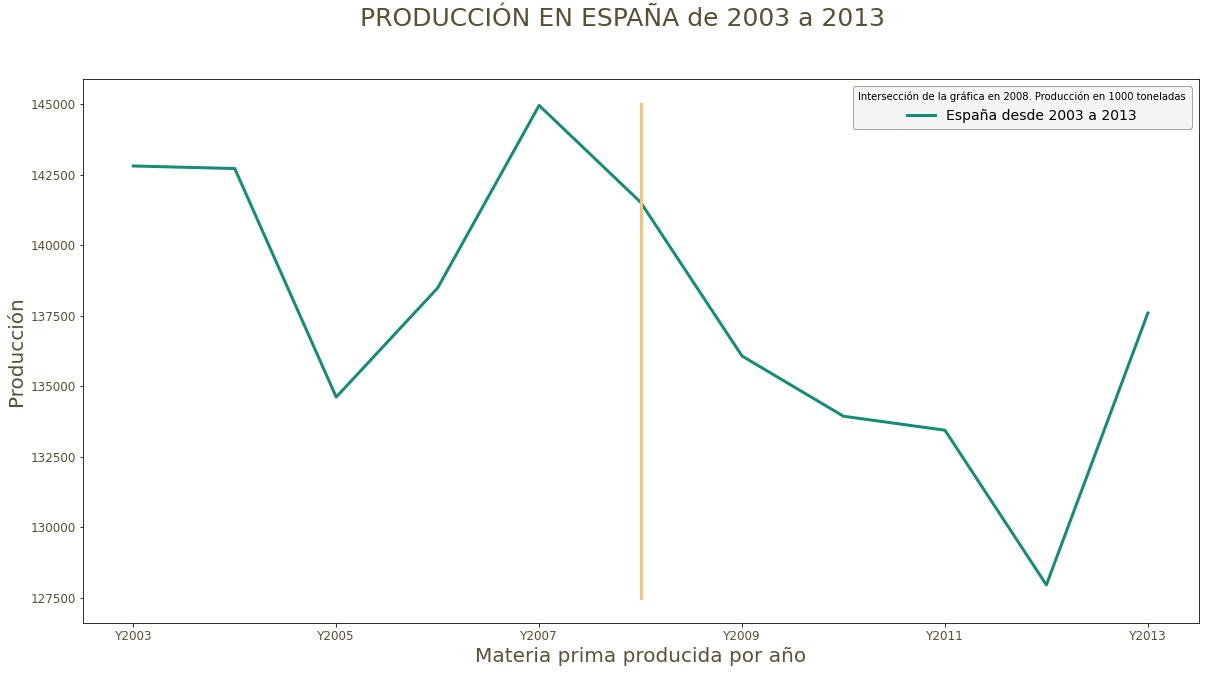

In [11]:
plt.figure(figsize=(20, 10))

Spain_years.plot(kind="line",label='España desde 2003 a 2013', color="#138D75",linewidth=3)

plt.legend(title="Intersección de la gráfica en 2008. Producción en 1000 toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRODUCCIÓN EN ESPAÑA de 2003 a 2013', size=25, color="#5A5034")
plt.xlabel("Materia prima producida por año", size=20, color="#5A5034")
plt.ylabel("Producción",size=20, color="#5A5034")
plt.xticks(rotation=0,FontSize=12,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")
plt.plot([5,5],[127500,145000],'k-', lw=3, color="#F8C471")

plt.savefig('Producción_España_2003-13.png',transparent=True)
plt.show()

Observamos como en 2007 alcanzamos el punto más alto a lo largo de la  historia de España en lo que se refiere a producción de materia prima. Y cómo drasticamente empezamos a descender y no es hasta 2012 que no comenzamos una recuperación de la crisis alimentaria.  

Para hacer un análisis mas exhaustivo, me centro en las materias primas producidas en España en 2008.
Dicho año, lo comparo con el año 2007 donde se obtuvo el mayor auge y con 2012 donde alcanzó el mínimo antes de la recuperación.

In [8]:
Spain_food = df.loc[:,['Area', 'Item','Y2005','Y2007', "Y2008",'Y2012']]
Spain_food = Spain_food[Spain_food.Area == 'Spain']
Spain_food

,Area,Item,Y2005,Y2007,Y2008,Y2012
17818,Spain,Wheat and products,5900.0,5400.0,5500.0,5000
17819,Spain,Wheat and products,3741.0,3846.0,4055.0,4411
17820,Spain,Rice (Milled Equivalent),1.0,1.0,1.0,1
17821,Spain,Rice (Milled Equivalent),298.0,310.0,335.0,383
17822,Spain,Barley and products,5800.0,9400.0,8700.0,5600
...,...,...,...,...,...,...
17963,Spain,Milk - Excluding Butter,2325.0,2466.0,2412.0,1933
17964,Spain,Milk - Excluding Butter,6921.0,7365.0,7310.0,7955
17965,Spain,"Fish, Seafood",396.0,272.0,391.0,147
17966,Spain,"Fish, Seafood",1770.0,1950.0,1911.0,1894


In [9]:
Spain_produ = Spain_food.groupby(["Item"], as_index=False)['Y2005','Y2007', "Y2008",'Y2012'].sum()
Spain_produ

,Item,Y2005,Y2007,Y2008,Y2012
0,Alcoholic Beverages,4944.0,4965.0,4786.0,4609
1,Animal fats,384.0,418.0,404.0,377
2,Apples and products,715.0,575.0,581.0,482
3,"Aquatic Animals, Others",26.0,17.0,24.0,3
4,Aquatic Plants,0.0,0.0,0.0,0
...,...,...,...,...,...
101,Vegetables,7428.0,7246.0,6912.0,6270
102,"Vegetables, Other",3972.0,4232.0,3825.0,3132
103,Wheat and products,9641.0,9246.0,9555.0,9411
104,Wine,1500.0,1203.0,1103.0,986


In [10]:
Spain_produ.set_index("Item", inplace=True)
Spain_produ

,Y2005,Y2007,Y2008,Y2012
Item,,,,
Alcoholic Beverages,4944.0,4965.0,4786.0,4609
Animal fats,384.0,418.0,404.0,377
Apples and products,715.0,575.0,581.0,482
"Aquatic Animals, Others",26.0,17.0,24.0,3
Aquatic Plants,0.0,0.0,0.0,0
...,...,...,...,...
Vegetables,7428.0,7246.0,6912.0,6270
"Vegetables, Other",3972.0,4232.0,3825.0,3132
Wheat and products,9641.0,9246.0,9555.0,9411


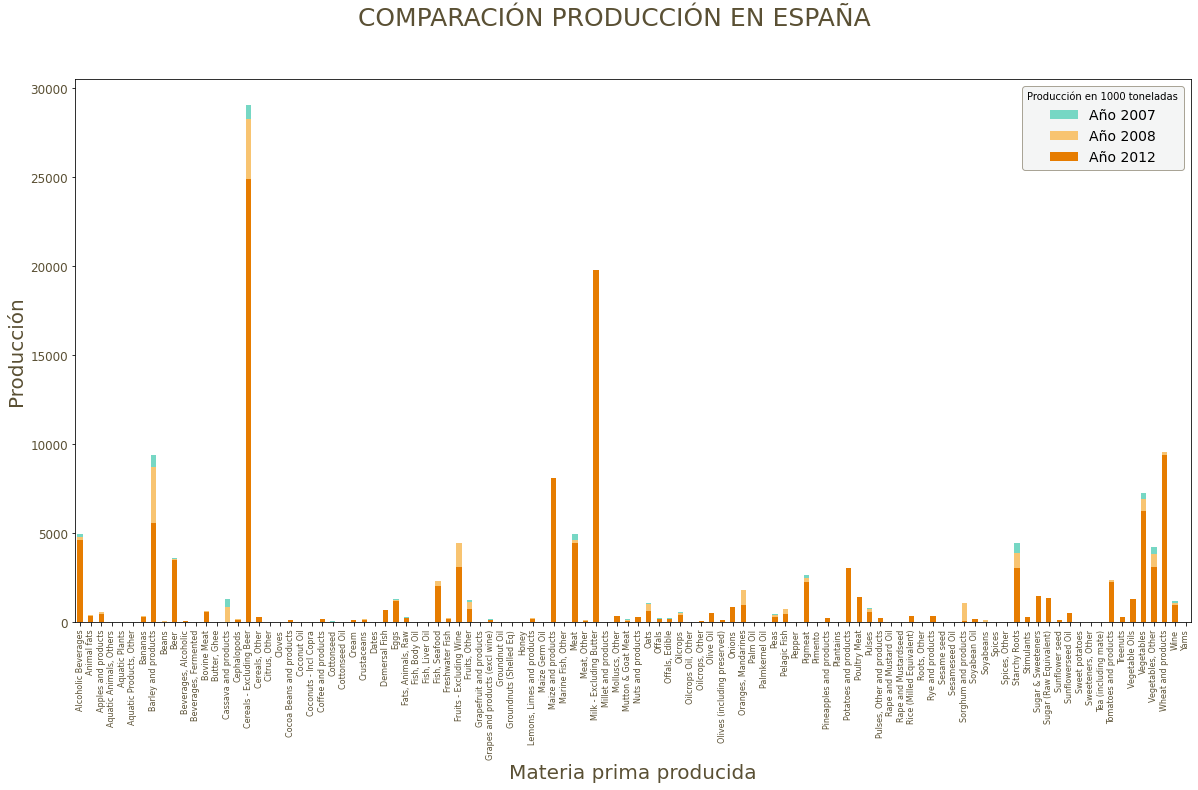

In [11]:
plt.figure(figsize=(20, 10))
Spain_produ.Y2007.plot(kind="bar",label='Año 2007',color="#76D7C4")
Spain_produ.Y2008.plot(kind="bar",label='Año 2008',color="#F8C471")
Spain_produ.Y2012.plot(kind="bar",label='Año 2012',color="#E67C00")
plt.legend(title="Producción en 1000 toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('COMPARACIÓN PRODUCCIÓN EN ESPAÑA', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Producción", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=8,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")
plt.savefig('Producción_España_anual_FAO.png',transparent=True)
plt.show()

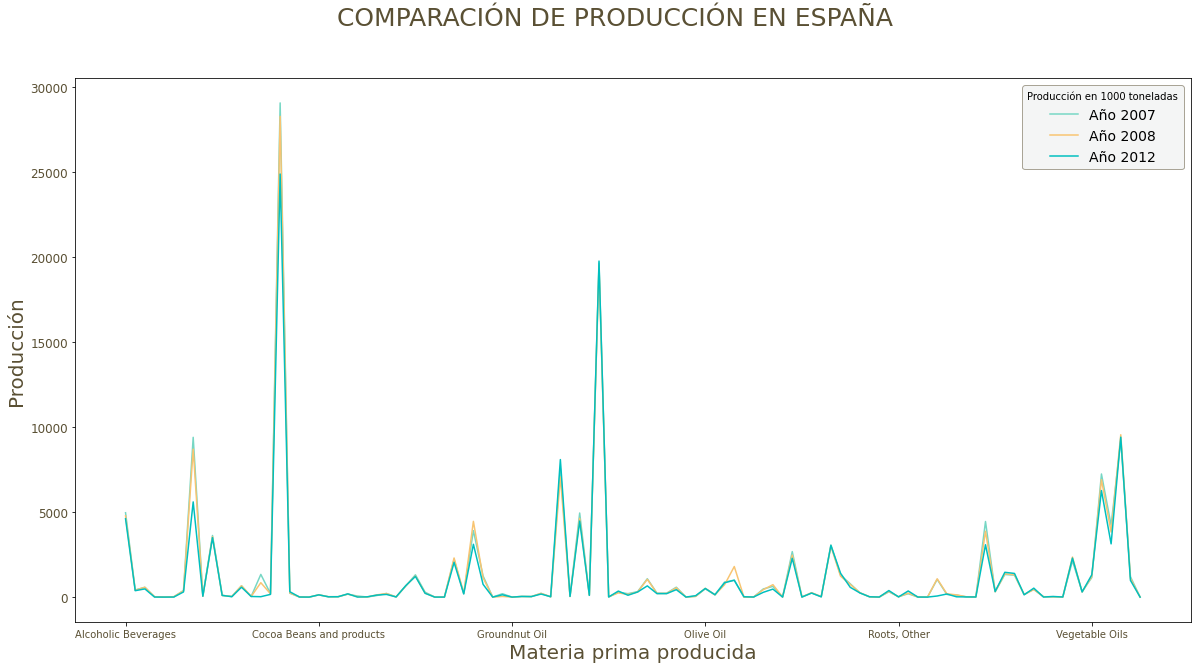

In [15]:
plt.figure(figsize=(20, 10))

Spain_produ.Y2007.plot(kind="line",label='Año 2007', color="#76D7C4")
Spain_produ.Y2008.plot(kind="line",label='Año 2008', color="#F8C471")
Spain_produ.Y2012.plot(kind="line",label='Año 2012',color="c")

plt.legend(title="Producción en 1000 toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('COMPARACIÓN DE PRODUCCIÓN EN ESPAÑA', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Producción", size=20, color="#5A5034")
plt.xticks(rotation=0,FontSize=10,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Comparación_Producción_España.png')
plt.show()

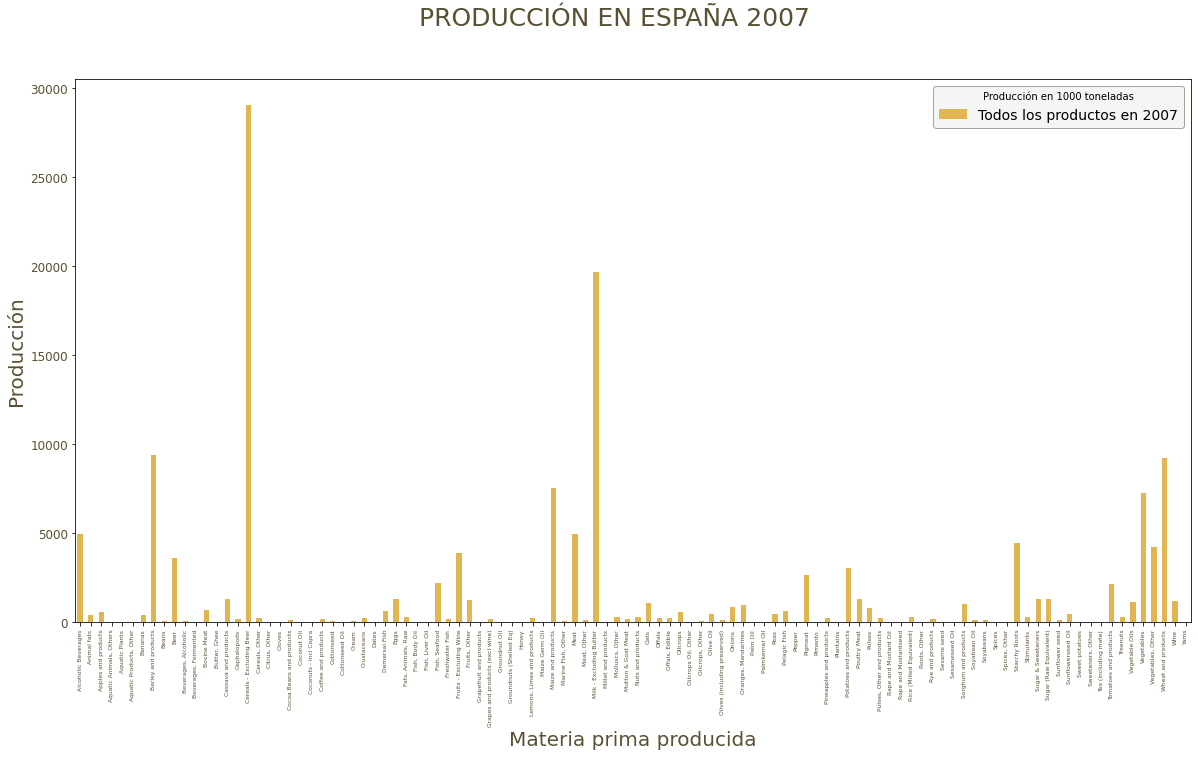

In [15]:
plt.figure(figsize=(20, 10))

Spain_produ.Y2007.plot(kind="bar",label='Todos los productos en 2007',align='center',color="#E2B553")

plt.legend(title="Producción en 1000 toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRODUCCIÓN EN ESPAÑA 2007', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Producción", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Producción_España2007.png',transparent=True)
plt.show()

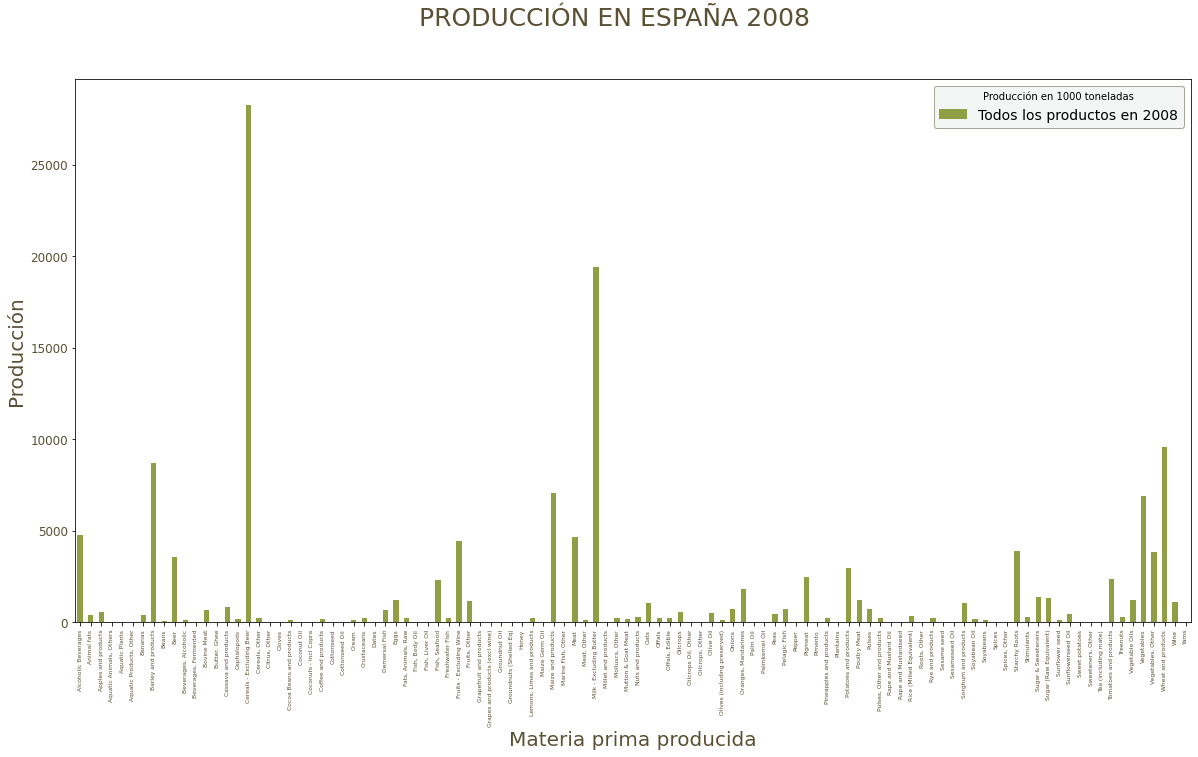

In [16]:
plt.figure(figsize=(20, 10))
Spain_produ.Y2008.plot(kind="bar",label='Todos los productos en 2008',align='center', color="#909F43")

plt.legend(title="Producción en 1000 toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRODUCCIÓN EN ESPAÑA 2008', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Producción", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Producción_España2008.png', transparent=True)
plt.show()

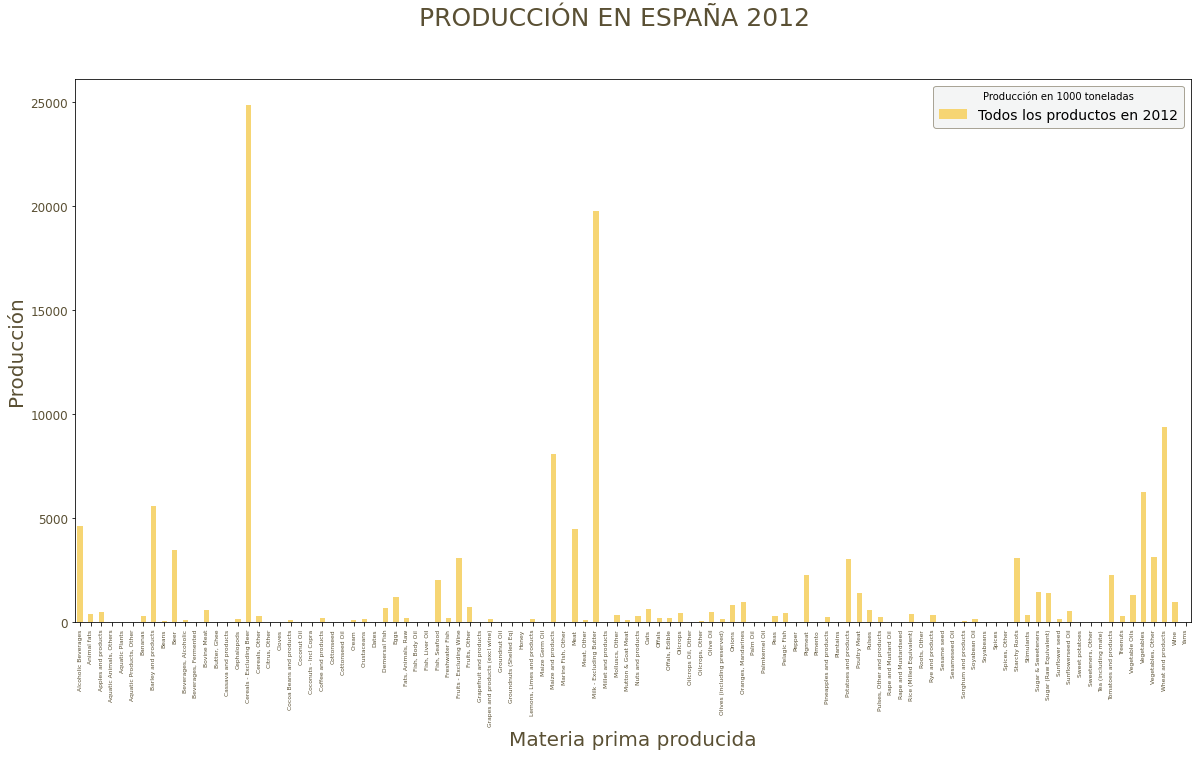

In [17]:
plt.figure(figsize=(20, 10))
Spain_produ.Y2012.plot(kind="bar",label='Todos los productos en 2012',align='center',color="#F6D573")

plt.legend(title="Producción en 1000 toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRODUCCIÓN EN ESPAÑA 2012', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Producción", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Producción_España2012.png',transparent=True)
plt.show()

Hay dos productos que destacan por encima de los demás en producción, son los cereales (excluyendo la cerveza) y la leche (excluyendo la mantequilla). Que en consecuencia son los que más afectados se ven debido a la crisis, en especial los cereales que pasa de una producción de casi 30 millones a 25 millones de toneladas.

La información obtenida por este dataset, decido corroborarla con más documentación que obtengo de internet.

## 2. DATASET

Para seguir comparando y contrastando información, sigo con la obtención de datos. Mi fuente sigue siendo FAO.org el enlace donde se descarga el dataset: http://www.fao.org/faostat/en/#data . Dicho dataset lo descarlo como csv y lo copio en la misma carpeta donde voy a trabajar. No lo hago directamente desde la web por la inmensidad de datos que hay y sería muy díficil trabajar directamente.

Con la información obtenida quiero comprobar que los datos que consigo del dataset de kaggle son iguales a los de la página oficial de las FAO

In [18]:
df2 = pd.read_csv("Production_Crops_E_All_Data_(Normalized).csv",encoding="ISO-8859-1",date_parser="Year")  
df2

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F,NaN
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F,NaN
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F,NaN
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F,NaN
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2489072,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5510,Production,2014,2014,tonnes,80046102.0,A,NaN
2489073,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5510,Production,2015,2015,tonnes,83042366.0,A,NaN
2489074,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5510,Production,2016,2016,tonnes,82575747.0,A,NaN
2489075,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5510,Production,2017,2017,tonnes,82311014.0,A,NaN


In [19]:
df2 = df2.loc[:,["Area", "Item", "Element", "Year", "Unit", "Value"]]
df2

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,"Almonds, with shell",Area harvested,1975,ha,0.0
1,Afghanistan,"Almonds, with shell",Area harvested,1976,ha,5900.0
2,Afghanistan,"Almonds, with shell",Area harvested,1977,ha,6000.0
3,Afghanistan,"Almonds, with shell",Area harvested,1978,ha,6000.0
4,Afghanistan,"Almonds, with shell",Area harvested,1979,ha,6000.0
...,...,...,...,...,...,...
2489072,Net Food Importing Developing Countries,Vegetables Primary,Production,2014,tonnes,80046102.0
2489073,Net Food Importing Developing Countries,Vegetables Primary,Production,2015,tonnes,83042366.0
2489074,Net Food Importing Developing Countries,Vegetables Primary,Production,2016,tonnes,82575747.0
2489075,Net Food Importing Developing Countries,Vegetables Primary,Production,2017,tonnes,82311014.0


In [48]:
df2.Item.value_counts()

Fruit Primary              39415
Vegetables Primary         39368
Roots and Tubers, Total    39199
Vegetables, fresh nes      38736
Oilcrops                   37294
                           ...  
Fruit, pome nes              690
Jojoba seed                  612
Kapokseed in shell           290
Kapok fibre                  290
Gums, natural                272
Name: Item, Length: 181, dtype: int64

Este dataset nos agrupa los alimentos de forma diferente al anterior. Pero podemos llegar a la misma conclusión de analisis de datos.

In [20]:
df2 = df2.loc[:,["Area", "Item", "Element", "Year", "Unit", "Value"]]

In [21]:
Spain_food2 = df2[df2.Area == 'Spain'] 
Spain_food2 = Spain_food2[Spain_food2.Element == "Production"]
Spain_food2

,Area,Item,Element,Year,Unit,Value
1495176,Spain,"Almonds, with shell",Production,1961,tonnes,204000.0
1495177,Spain,"Almonds, with shell",Production,1962,tonnes,130000.0
1495178,Spain,"Almonds, with shell",Production,1963,tonnes,152000.0
1495179,Spain,"Almonds, with shell",Production,1964,tonnes,152000.0
1495180,Spain,"Almonds, with shell",Production,1965,tonnes,153000.0
...,...,...,...,...,...,...
1514174,Spain,Vegetables Primary,Production,2014,tonnes,12574292.0
1514175,Spain,Vegetables Primary,Production,2015,tonnes,12513475.0
1514176,Spain,Vegetables Primary,Production,2016,tonnes,13136700.0
1514177,Spain,Vegetables Primary,Production,2017,tonnes,13146752.0


Obtengo toda la producción de materia prima producida en España por años desde 1961 hasta 2018. Que es el último año que FAO tiene recogida de datos y actualizados. 

In [22]:
year2 = df2.groupby("Year")["Value"].sum()
year2

Year
1961    4.174069e+10
1962    4.285305e+10
1963    4.357003e+10
1964    4.502880e+10
1965    4.536702e+10
1966    4.695661e+10
1967    4.848699e+10
1968    4.912453e+10
1969    4.948117e+10
1970    5.069682e+10
1971    5.236668e+10
1972    5.152529e+10
1973    5.470005e+10
1974    5.441713e+10
1975    5.526929e+10
1976    5.709636e+10
1977    5.801799e+10
1978    6.074489e+10
1979    6.022913e+10
1980    5.989091e+10
1981    6.219971e+10
1982    6.408039e+10
1983    6.270656e+10
1984    6.669389e+10
1985    6.745392e+10
1986    6.795304e+10
1987    6.747408e+10
1988    6.727385e+10
1989    7.039572e+10
1990    7.188061e+10
1991    7.172334e+10
1992    7.417940e+10
1993    7.342665e+10
1994    7.505993e+10
1995    7.529165e+10
1996    7.951306e+10
1997    8.052828e+10
1998    8.110770e+10
1999    8.224286e+10
2000    8.269877e+10
2001    8.406775e+10
2002    8.417737e+10
2003    8.597109e+10
2004    9.066462e+10
2005    9.147583e+10
2006    9.279841e+10
2007    9.695173e+10
2008    

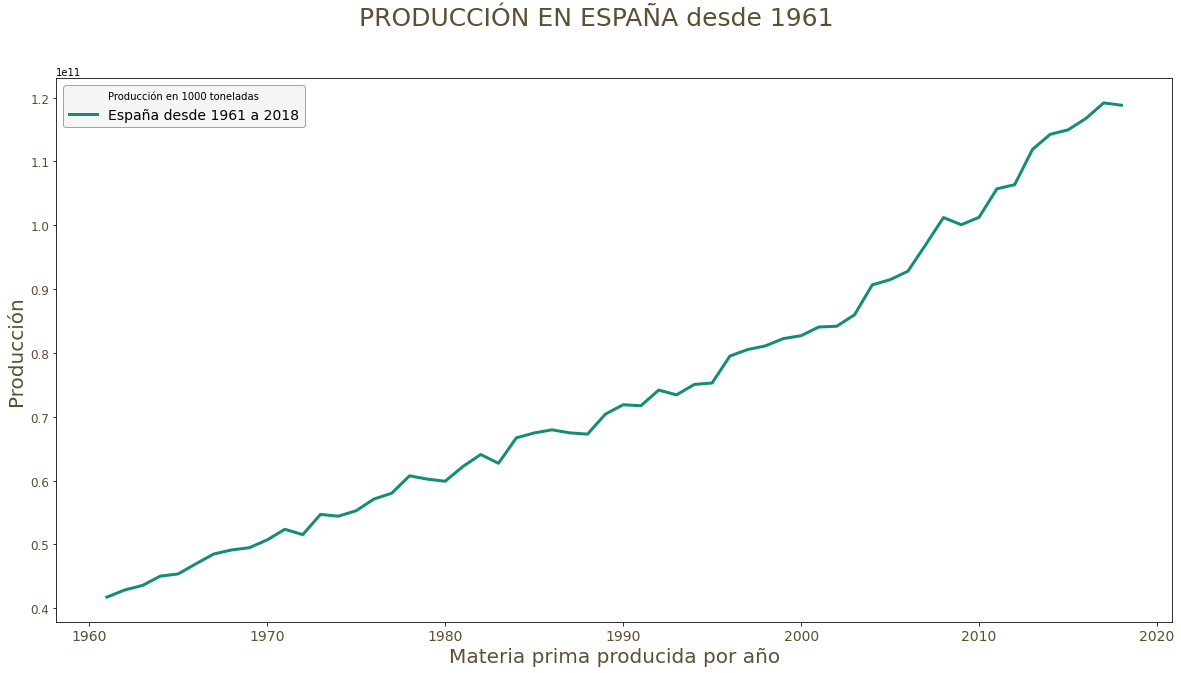

In [24]:
plt.figure(figsize=(20, 10))
year2.plot(kind="line",label='España desde 1961 a 2018', color="#138D75", linewidth=3)
plt.legend(title="Producción en 1000 toneladas",loc='top_left',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRODUCCIÓN EN ESPAÑA desde 1961', size=25, color="#5A5034")
plt.xlabel("Materia prima producida por año",size=20, color="#5A5034")
plt.ylabel("Producción",size=20, color="#5A5034")
plt.xticks(rotation=0,FontSize=14,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Producción_España_desde1961_2018_FAO.png',transparent=True)
plt.show()

Aunque la representación de esta gráfica es ascendente de una manera más lineal que la obtenida en el otro dataset se ve que en 2008 hay un descenso claro de la producción de materias primas en España y que no hay una recuperación clara hasta unos años después.

Comparamos la cantidad de toneladas de producción en España en los años más significativos
* 2007 debido al máximo apogeo que hubo de dicha producción.
* 2008 momento de crisis en España.
* 2012 momento final de la crisis donde se tocó fondo y se empezó la recuperación.

In [29]:
Spain_food2 = df2[df2.Area == 'Spain'] 
Spain_food2 = Spain_food2[Spain_food2.Element == "Production"]
Spain_food2

,Area,Item,Element,Year,Unit,Value
1495176,Spain,"Almonds, with shell",Production,1961,tonnes,204000.0
1495177,Spain,"Almonds, with shell",Production,1962,tonnes,130000.0
1495178,Spain,"Almonds, with shell",Production,1963,tonnes,152000.0
1495179,Spain,"Almonds, with shell",Production,1964,tonnes,152000.0
1495180,Spain,"Almonds, with shell",Production,1965,tonnes,153000.0
...,...,...,...,...,...,...
1514174,Spain,Vegetables Primary,Production,2014,tonnes,12574292.0
1514175,Spain,Vegetables Primary,Production,2015,tonnes,12513475.0
1514176,Spain,Vegetables Primary,Production,2016,tonnes,13136700.0
1514177,Spain,Vegetables Primary,Production,2017,tonnes,13146752.0


In [30]:
year2007= Spain_food2[Spain_food2.Year == 2007]
year2007 =year2007.loc[:,["Item","Year","Value"]].set_index("Item")

year2008 = Spain_food2[Spain_food2.Year == 2008]
year2008 = year2008.loc[:,["Item","Year","Value"]].set_index("Item")

year2012 = Spain_food2[Spain_food2.Year == 2012]
year2012 = year2012.loc[:,["Item","Year","Value"]].set_index("Item")


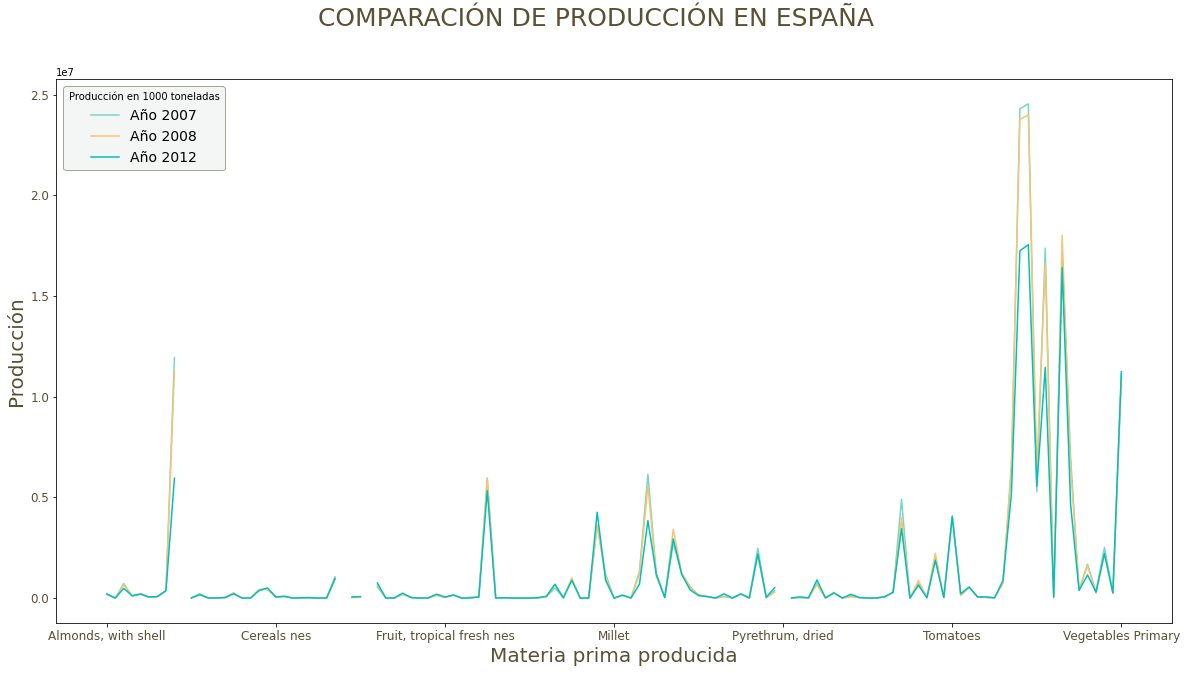

In [31]:
plt.figure(figsize=(20, 10))

year2007.Value.plot(kind="line",label='Año 2007', color="#76D7C4")
year2008.Value.plot(kind="line",label='Año 2008', color="#F8C471")
year2012.Value.plot(kind="line",label='Año 2012',color="c")

plt.legend(title="Producción en 1000 toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('COMPARACIÓN DE PRODUCCIÓN EN ESPAÑA', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Producción", size=20, color="#5A5034")
plt.xticks(rotation=45,FontSize=12,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Comparación_Producción_España_FAO.png')
plt.show()

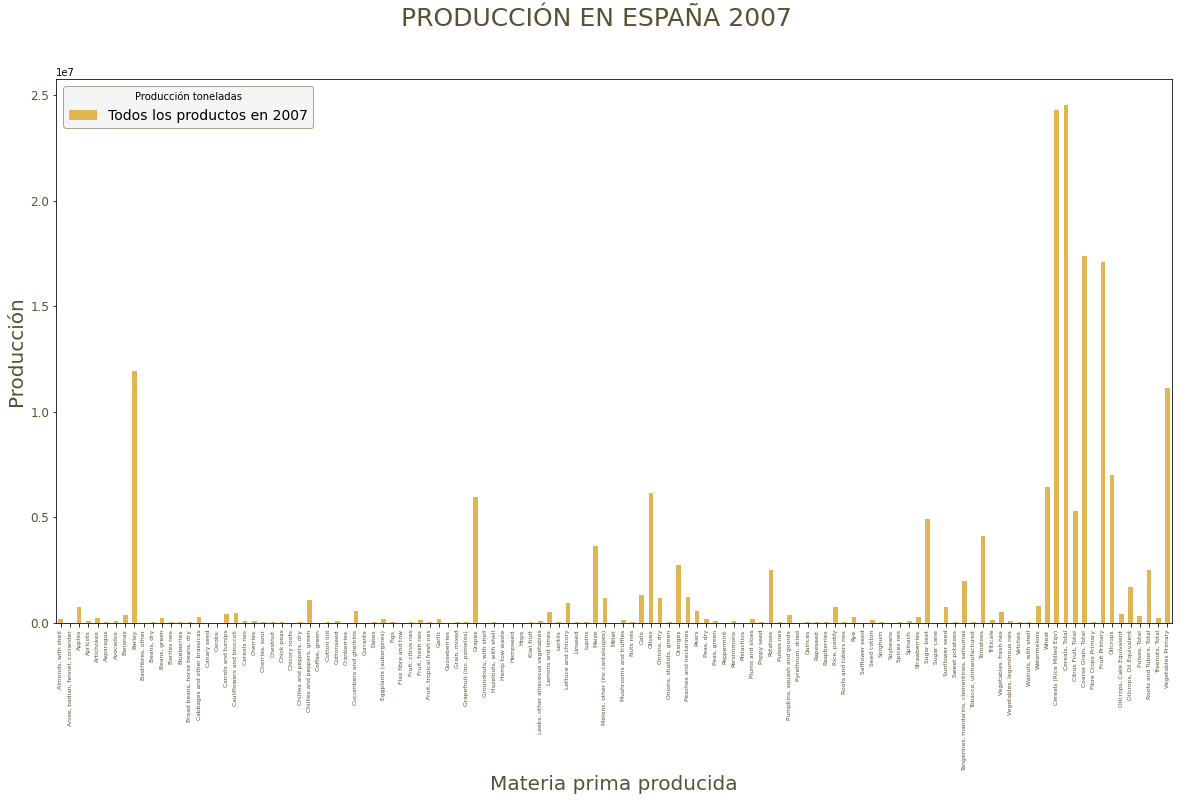

In [33]:
plt.figure(figsize=(20, 10))

year2007.Value.plot(kind="bar",label='Todos los productos en 2007',align='center',color="#E2B553")

plt.legend(title="Producción toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRODUCCIÓN EN ESPAÑA 2007', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Producción", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Producción_España2007_FAO.png')
plt.show()

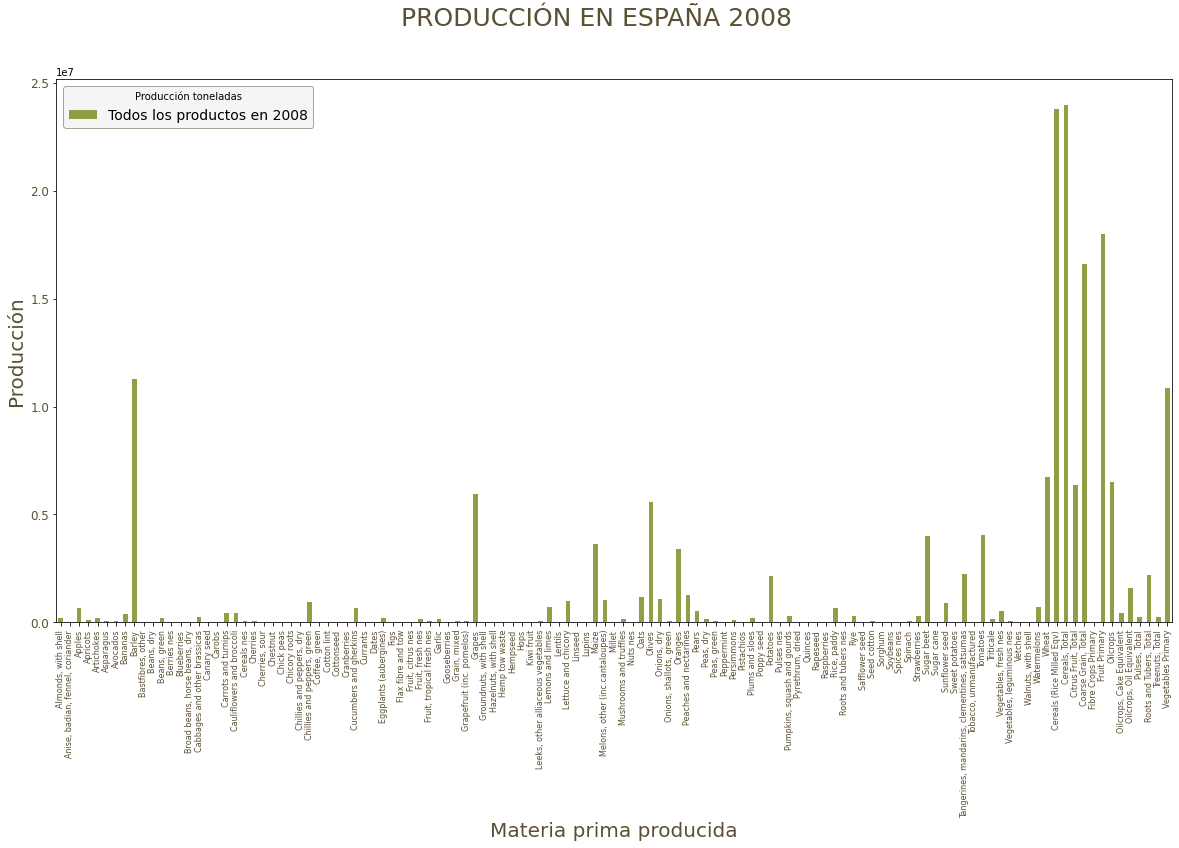

In [31]:
plt.figure(figsize=(20, 10))
year2008.Value.plot(kind="bar",label='Todos los productos en 2008',align='center', color="#909F43")

plt.legend(title="Producción toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRODUCCIÓN EN ESPAÑA 2008', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Producción", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=8,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Producción_España2008_FAO.png')
plt.show()

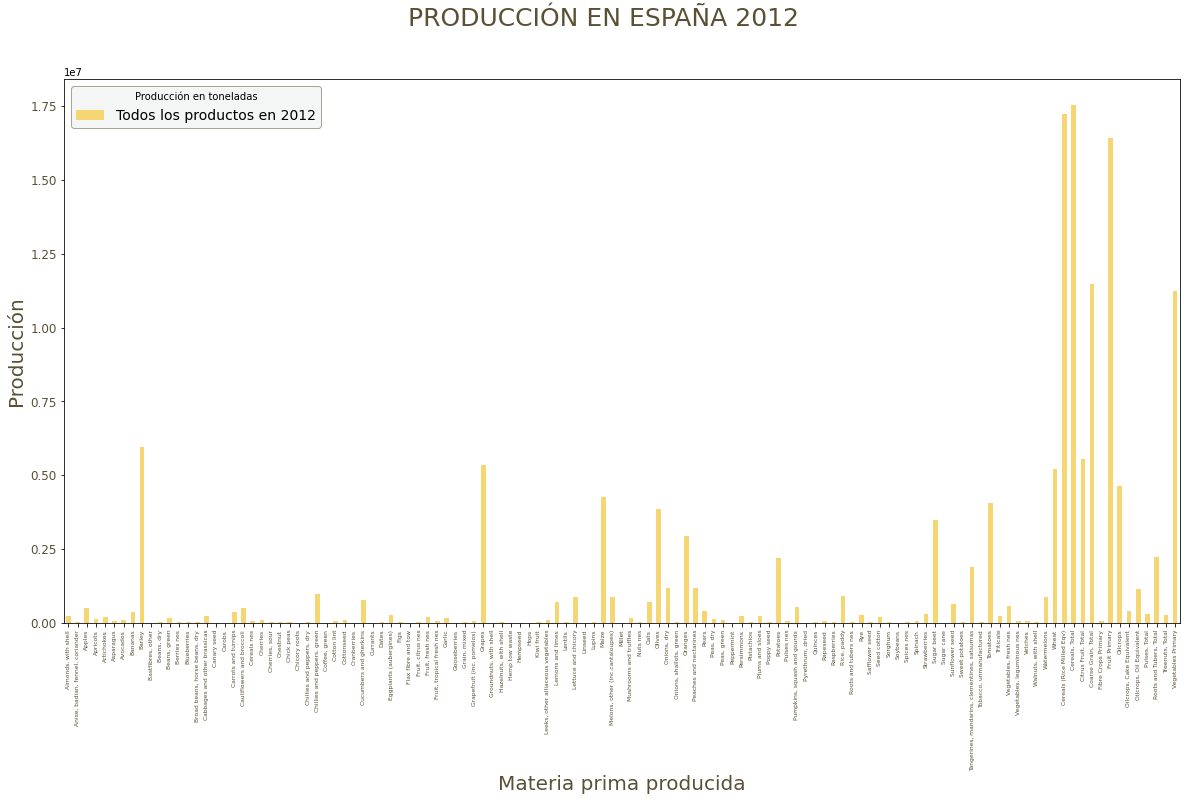

In [34]:
plt.figure(figsize=(20, 10))
year2012.Value.plot(kind="bar",label='Todos los productos en 2012',align='center',color="#F6D573")

plt.legend(title="Producción en toneladas",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=0.5, fontsize=14)
plt.suptitle('PRODUCCIÓN EN ESPAÑA 2012', size=25, color="#5A5034")
plt.xlabel("Materia prima producida", size=20, color="#5A5034")
plt.ylabel("Producción", size=20, color="#5A5034")
plt.xticks(rotation=90,FontSize=6,color="#5A5034")
plt.yticks(rotation=0,FontSize=12,color="#5A5034")

plt.savefig('Producción_España2012_FAO.png')
plt.show()

Llegamos a la misma conclusión donde el producto que más se vió afectado y el que más producimos son los cereales.
Los dos dataset aunque con nombres diferentes en las materias primas nos proporcionan la misma información.

No conforme con esta información obtenida para corroborar mi hipótesis. Sigo investigando y decido contrastar precio - materia prima a nivel nacional y cómo ha influenciado en la crisis.

Para seguir trabajando y que este archivo no sea demasiado extenso genero otro archivo de jupiter llamado precio_materia_prima_opcionC.para seguir con el análisis del estudio